In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv("weather_data.csv")

In [10]:
data['Day+1 Temp'] = data['temperature'].shift(-1)
data['Day+2 Temp'] = data['temperature'].shift(-2)
data['Day+3 Temp'] = data['temperature'].shift(-3)

# Drop rows with NaN values created by shifting
data = data.dropna()

# Define features (X) and targets (y)
X = data[[
    'Outdoor Drybulb Temperature [C]',
    'Outdoor Relative Humidity [%]',
    'Diffuse Solar Radiation [W/m2]',
    'Direct Solar Radiation [W/m2]'
]]
y = data[['Day+1 Temp', 'Day+2 Temp', 'Day+3 Temp']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients and intercepts
print("Coefficients for each target:", model.coef_)
print("Intercepts for each target:", model.intercept_)

Coefficients for each target: [[35.79448121  2.20596723  1.79947223  2.36050868]
 [34.66530657  4.80700284  3.19769664  4.29599749]
 [33.54500335  7.56379228  4.11847242  5.74930515]]
Intercepts for each target: [-2.70059888 -4.14806538 -5.53969271]


In [14]:
y_pred = model.predict(X_test)

# Evaluate performance for each target variable
for i, target in enumerate(['Day+1 Temp', 'Day+2 Temp', 'Day+3 Temp']):
    print(f"Metrics for {target}:")
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    mae = mean_absolute_error(y_test.iloc[:, i], y_pred[:, i])
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  R-squared (R2): {r2}")
    print()

Metrics for Day+1 Temp:
  Mean Squared Error (MSE): 0.3207487693441704
  Mean Absolute Error (MAE): 0.4373685378938166
  R-squared (R2): 0.9939296149393085

Metrics for Day+2 Temp:
  Mean Squared Error (MSE): 1.372449440947702
  Mean Absolute Error (MAE): 0.9099469325310712
  R-squared (R2): 0.9742567317238715

Metrics for Day+3 Temp:
  Mean Squared Error (MSE): 3.1163230378520907
  Mean Absolute Error (MAE): 1.379967298791819
  R-squared (R2): 0.9420983746912384



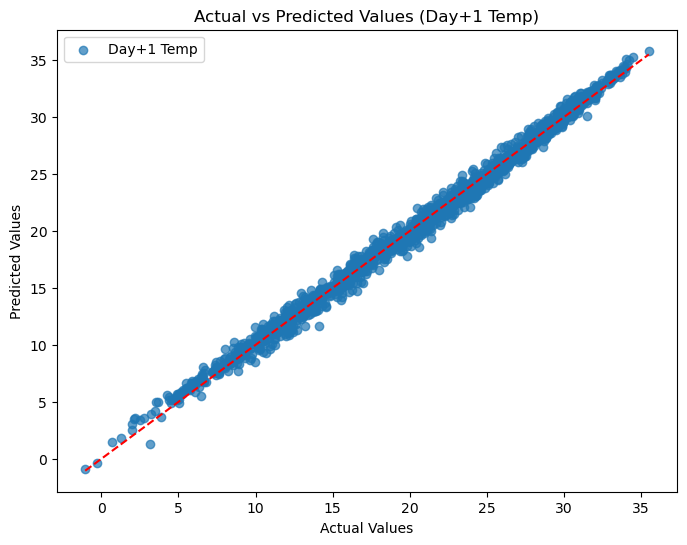

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test.iloc[:, 0], y_pred[:, 0], alpha=0.7, label='Day+1 Temp')
plt.plot([min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])],
         [min(y_test.iloc[:, 0]), max(y_test.iloc[:, 0])], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Day+1 Temp)")
plt.legend()
plt.show()

In [21]:
# Example current conditions for prediction (replace with actual values)
current_conditions = pd.DataFrame({
    'Outdoor Drybulb Temperature [C]': [30],  # Replace with actual value
    'Outdoor Relative Humidity [%]': [50],   # Replace with actual value
    'Diffuse Solar Radiation [W/m2]': [200], # Replace with actual value
    'Direct Solar Radiation [W/m2]': [400]  # Replace with actual value
})

# Normalize the current conditions using the scaler
current_conditions_scaled = scaler.transform(current_conditions)

# Predict future temperatures
future_predictions = model.predict(current_conditions_scaled)
print(f"Predicted Temperatures for Next Days:")
print(f"  Day 1: {future_predictions[0, 0]:.2f}°C")
print(f"  Day 2: {future_predictions[0, 1]:.2f}°C")
print(f"  Day 3: {future_predictions[0, 2]:.2f}°C")


Predicted Temperatures for Next Days:
  Day 1: 30.01°C
  Day 2: 29.69°C
  Day 3: 29.09°C
